# King County Housing 

Business Problem: Real Estate Investment Firm 

columns to avoid according to project intro
- date
- view
- sqft_above
- sqft_basement
- yr_renovated
- zipcode
- lat 
- long
- sqft_living15
- sqft_lot 15


In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor 

In [2]:
#reading in dataframe
kc_house = pd.read_csv('data/kc_house_data.csv', parse_dates=['date'])

In [3]:
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [5]:
#dropping columns that I don't believe are necessary
kc_house.drop(['lat', 'long', 'view', 'sqft_living15', 'sqft_lot15', 'yr_renovated', 'id', 'waterfront'], axis=1, inplace=True)

#sanity check
kc_house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,98178
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,98125
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,98028
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,98136
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,98074


In [6]:
#defining X and y
X = kc_house.drop(columns='price')
y = kc_house['price']

In [7]:
#sanity check
print(X.shape)
X.head()

(21597, 12)


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,2014-10-13,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,98178
1,2014-12-09,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,98125
2,2015-02-25,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,98028
3,2014-12-09,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,98136
4,2015-02-18,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,98074


In [8]:
#sanity check
print(y.shape)
y.head()

(21597,)


0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

---------------------
## Splitting the data into train and test before EDA to avoid data leakage

In [9]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
#creating a train df and test df
train_kch = pd.concat([X_train, y_train], axis=1)
test_kch = pd.concat([X_test, y_test], axis=1)

In [11]:
#obtaining their respective shapes to keep track 
print(f'Training shape: {train_kch.shape}')
print(f'Testing shape: {test_kch.shape}')

Training shape: (17277, 13)
Testing shape: (4320, 13)


-----------------

## EDA King County House - Train Data

In [12]:
#from now on using train_kch to make model decisions however whatever is done to train must be done to test
#sanity check
train_kch.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,price
6243,2014-12-22,4,2.00,1440,4855,2.0,Good,7 Average,1440,0.0,1972,98144,332500.0
8986,2015-05-12,3,1.75,1430,9857,1.0,Good,7 Average,1140,290.0,1980,98045,390000.0
9419,2014-12-29,4,2.75,3120,5000,2.0,Average,9 Better,3120,0.0,2010,98074,800000.0
10155,2015-03-21,4,2.50,2060,6958,1.0,Average,7 Average,1220,840.0,1974,98034,462000.0
10436,2014-07-01,3,2.00,2500,4080,1.5,Very Good,7 Average,1680,820.0,1922,98103,695000.0


In [13]:
train_kch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17277 entries, 6243 to 15795
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           17277 non-null  datetime64[ns]
 1   bedrooms       17277 non-null  int64         
 2   bathrooms      17277 non-null  float64       
 3   sqft_living    17277 non-null  int64         
 4   sqft_lot       17277 non-null  int64         
 5   floors         17277 non-null  float64       
 6   condition      17277 non-null  object        
 7   grade          17277 non-null  object        
 8   sqft_above     17277 non-null  int64         
 9   sqft_basement  17277 non-null  object        
 10  yr_built       17277 non-null  int64         
 11  zipcode        17277 non-null  int64         
 12  price          17277 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(3)
memory usage: 1.8+ MB


In [14]:
#null-value check
train_kch.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
price            0
dtype: int64

No missing values great!

In [15]:
train_kch.shape

(17277, 13)

### Deep Dive into the Columns

Taking a look at the columns like: bedrooms, bathrooms, sqft_living, floors, sqft_above, sqft_basement, and yr_built
- Histograms for bedrooms, bathrooms, and floors
- Lineplot for yr_built
- Scatterplot for sqft_living, sqft_above, and sqft_basement

In [16]:
#starting with sqft_basement sense it is an object should be numeric 
#change the dtype sqft_basement
train_kch['sqft_basement'].value_counts()

0.0       10248
?           358
600.0       174
500.0       168
800.0       159
          ...  
1275.0        1
3480.0        1
1960.0        1
1920.0        1
274.0         1
Name: sqft_basement, Length: 286, dtype: int64

Interesting find since there is a ? could this mean that there is no basement/unknown. Can impute by the median sqft_basement but think it is better for it to be 0.0.

In [17]:
#first change question mark to 0.0 since could not find anything to what the ? mark mean
train_kch['sqft_basement'] = train_kch['sqft_basement'].str.replace('?', '0.0')

In [18]:
train_kch['sqft_basement'].value_counts()

0.0       10606
600.0       174
500.0       168
800.0       159
700.0       158
          ...  
1275.0        1
3480.0        1
1960.0        1
1920.0        1
274.0         1
Name: sqft_basement, Length: 285, dtype: int64

In [19]:
#changing its dtype from object to float
train_kch['sqft_basement'] = train_kch['sqft_basement'].astype(float)

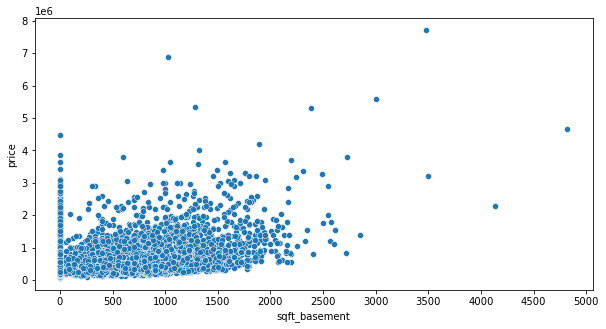

In [20]:
#make a quick plot showing the relationship between sqft_basement and price

plt.figure(figsize=(10, 5))
sns.scatterplot(data=train_kch, x="sqft_basement", y="price")
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]);

There isn't a very strong linear relationship between sqft_basement and price. It toes the line with one of the assumptions of Linear Regression; so is this value even worth to have in the final model? Also you can a see very clear outliers in price some points almost in the 6 million to 8 million range.

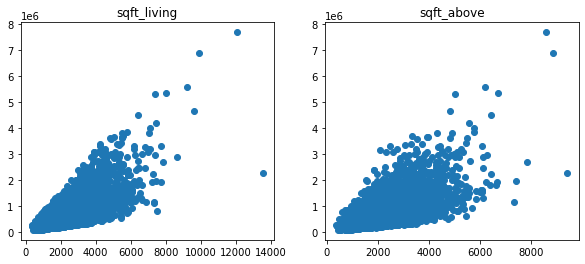

In [21]:
#plotting sqft_above and sqft_living
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(train_kch['sqft_living'], train_kch['price'])
axes[1].scatter(train_kch['sqft_above'], train_kch['price'])

axes[0].set_title("sqft_living")
axes[1].set_title("sqft_above");

There is a stronger linear relationship with sqft_living compared to sqft_above

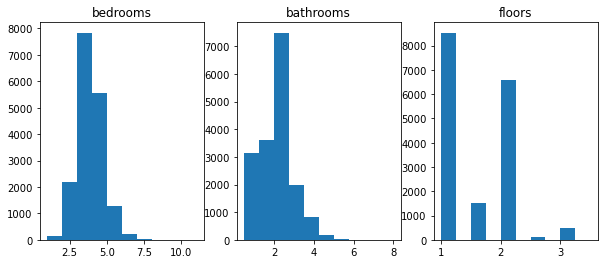

In [22]:
#let's have a look at bedrooms, bathrooms, and floors
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
axes[0].hist(train_kch['bedrooms'])
axes[1].hist(train_kch['bathrooms'])
axes[2].hist(train_kch['floors'])

axes[0].set_title("bedrooms")
axes[1].set_title("bathrooms")
axes[2].set_title("floors");

- Bedroons values seem to be between 1 and 8 
- Bathrooms between 1 and 5 almost 6
- Floors between 1 and 3

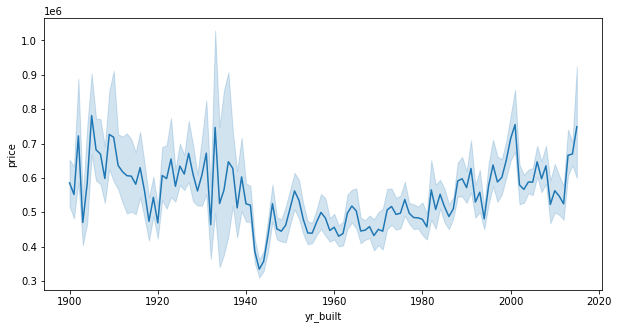

In [23]:
#yr_built
plt.figure(figsize=(10, 5))
sns.lineplot(data=train_kch, x='yr_built', y='price');

The price fluctuates a lot but it reached its peak around the 1910s.

In [24]:
#looking at the statistics for numerical values 
pd.set_option('display.float_format', lambda x: '%.5f' % x)
train_kch.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,zipcode,price
count,17277.00000,17277.00000,17277.00000,17277.00000,17277.00000,17277.00000,17277.00000,17277.00000,17277.00000,17277.00000
mean,3.37489,2.11456,2083.49829,14989.62864,1.49499,1790.33721,287.59912,1970.96527,98078.00064,541519.00943
std,0.90440,0.76768,917.55102,40198.03183,0.54094,825.99428,441.33459,29.35621,53.52185,368968.72676
min,1.00000,0.50000,370.00000,520.00000,1.00000,370.00000,0.00000,1900.00000,98001.00000,78000.00000
25%,3.00000,1.75000,1430.00000,5060.00000,1.00000,1200.00000,0.00000,1952.00000,98033.00000,324000.00000
50%,3.00000,2.25000,1920.00000,7609.00000,1.50000,1570.00000,0.00000,1975.00000,98065.00000,450000.00000
75%,4.00000,2.50000,2550.00000,10720.00000,2.00000,2220.00000,550.00000,1997.00000,98117.00000,645500.00000
max,11.00000,8.00000,13540.00000,1651359.00000,3.50000,9410.00000,4820.00000,2015.00000,98199.00000,7700000.00000


- The median for bedrooms are 3, and the bathrooms are 2.25
- The median for floor is 1.5 
- The median yr_built is 1975 
- The max value for price is 7.7 million dollars with the 75% of the data falling between 645,500 thousands, which is a massive outlier - have to handle that

-----------
### Feature Engineering - creating maps for the categorical variables condition, floors, zipcode & adding price per sqft column

- Condition: How good the overall condition of the house is. Related to maintenance of house.
- Grade: Overall grade of the house. Related to the construction and design of the house.

In [25]:
#creating price per squarefoot
train_kch['price_sqft'] = train_kch['price']/train_kch['sqft_living']

In [26]:
#creating a map for condition since there are low values of Poor and Fair compared to the other categorical variables
condition_map = {'Poor': 0,
                 'Fair': 1,
                 'Average': 2,
                 'Good': 3,
                 'Very Good': 4,
                }

#adding to train_kch
train_kch['cond_num'] = train_kch['condition'].map(condition_map)
train_kch.drop('condition', axis = 1, inplace=True);

In [27]:
#mapping grade map
grade_map = {'3 Poor': 3,
             '4 Low': 4,
             '5 Fair': 5,
             '6 Low Average': 6,
             '7 Average': 7,
             '8 Good': 8,
             '9 Better': 9,
             '10 Very Good': 10,
             '11 Excellent': 11,
             '12 Luxury': 12,
             '13 Mansion': 13}

#adding in to train_kch
train_kch['grade_num'] = train_kch['grade'].map(grade_map)
train_kch.drop('grade', axis = 1, inplace=True);

In [28]:
#creating map for zipcodes
zip_map = {
    98001:'Suburbs', 98002:'Suburbs', 98003:'Suburbs', 98004:'Suburbs', 98005:'Suburbs',
    98006:'Suburbs', 98007:'Suburbs',98008:'Suburbs', 98010:'Rural', 98011:'Suburbs', 
    98014:'Rural', 98019:'Rural', 98022:'Rural', 98023:'Suburbs', 98024:'Rural', 
    98027:'Rural', 98028:'Suburbs', 98029:'Suburbs', 98030:'Suburbs', 98031:'Suburbs',
    98032:'Suburbs', 98033:'Suburbs', 98034:'Suburbs', 98038:'Rural', 98039:'Suburbs',
    98040:'Suburbs', 98042:'Rural', 98045:'Rural', 98052:'Suburbs', 98053:'Rural',
    98055:'Suburbs', 98056:'Suburbs', 98058:'Suburbs', 98059:'Suburbs', 98065:'Rural',
    98070:'Suburbs', 98072:'Suburbs', 98074:'Suburbs', 98075:'Suburbs', 98077:'Rural',
    98092:'Suburbs', 98102:'Seattle', 98103:'Seattle', 98105:'Seattle', 98106:'Seattle',
    98107:'Seattle', 98108:'Seattle', 98109:'Seattle', 98112:'Seattle', 98115:'Seattle', 
    98116:'Seattle', 98117:'Seattle', 98118:'Seattle', 98119:'Seattle', 98122:'Seattle',
    98125:'Seattle', 98126:'Seattle', 98133:'Seattle', 98136:'Seattle', 98144:'Seattle', 
    98146:'Seattle', 98148:'Seattle', 98155:'Seattle', 98166:'Seattle', 98168:'Seattle',
    98177:'Seattle', 98178:'Seattle', 98188:'Seattle', 98198:'Seattle', 98199:'Seattle'
    }


#adding in to train_kch
train_kch['zones'] = train_kch['zipcode'].map(zip_map)
train_kch.drop('zipcode', axis = 1, inplace=True);

#sanity check
train_kch.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,price,price_sqft,cond_num,grade_num,zones
6243,2014-12-22,4,2.00000,1440,4855,2.00000,1440,0.00000,1972,332500.00000,230.90278,3,7,Seattle
8986,2015-05-12,3,1.75000,1430,9857,1.00000,1140,290.00000,1980,390000.00000,272.72727,3,7,Rural
9419,2014-12-29,4,2.75000,3120,5000,2.00000,3120,0.00000,2010,800000.00000,256.41026,2,9,Suburbs
10155,2015-03-21,4,2.50000,2060,6958,1.00000,1220,840.00000,1974,462000.00000,224.27184,2,7,Suburbs
10436,2014-07-01,3,2.00000,2500,4080,1.50000,1680,820.00000,1922,695000.00000,278.00000,4,7,Seattle


### Outlier Handling

From the above graphs we could see that there were some outliers in price with 75% of the data equal to 650K while the max was 7.7million. Could do this by z-score or IQR range threshold

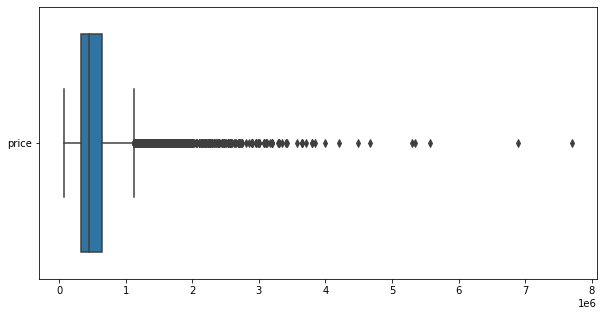

In [29]:
#boxplot of price
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_kch[["price"]], orient="h");

From the boxplot can see that their is alot of outliers

In [30]:
#finding the zscore for the price column and adding it to the train_kch
train_kch['zscore_price'] = (train_kch['price'] - train_kch['price'].mean())/train_kch['price'].std()
train_kch.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,price,price_sqft,cond_num,grade_num,zones,zscore_price
6243,2014-12-22,4,2.00000,1440,4855,2.00000,1440,0.00000,1972,332500.00000,230.90278,3,7,Seattle,-0.56650
8986,2015-05-12,3,1.75000,1430,9857,1.00000,1140,290.00000,1980,390000.00000,272.72727,3,7,Rural,-0.41066
9419,2014-12-29,4,2.75000,3120,5000,2.00000,3120,0.00000,2010,800000.00000,256.41026,2,9,Suburbs,0.70055
10155,2015-03-21,4,2.50000,2060,6958,1.00000,1220,840.00000,1974,462000.00000,224.27184,2,7,Suburbs,-0.21552
10436,2014-07-01,3,2.00000,2500,4080,1.50000,1680,820.00000,1922,695000.00000,278.00000,4,7,Seattle,0.41597


In [31]:
#storing those outliers in a new dataset
outliers = train_kch[(train_kch['zscore_price']<-3) | (train_kch['zscore_price']>3)]
outliers.shape

(330, 15)

In [32]:
#removing those outliers from train_kch
train_kch = train_kch[(train_kch['zscore_price']>-3) & (train_kch['zscore_price']<3)]
print(train_kch.shape)
train_kch.head()

(16947, 15)


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,price,price_sqft,cond_num,grade_num,zones,zscore_price
6243,2014-12-22,4,2.00000,1440,4855,2.00000,1440,0.00000,1972,332500.00000,230.90278,3,7,Seattle,-0.56650
8986,2015-05-12,3,1.75000,1430,9857,1.00000,1140,290.00000,1980,390000.00000,272.72727,3,7,Rural,-0.41066
9419,2014-12-29,4,2.75000,3120,5000,2.00000,3120,0.00000,2010,800000.00000,256.41026,2,9,Suburbs,0.70055
10155,2015-03-21,4,2.50000,2060,6958,1.00000,1220,840.00000,1974,462000.00000,224.27184,2,7,Suburbs,-0.21552
10436,2014-07-01,3,2.00000,2500,4080,1.50000,1680,820.00000,1922,695000.00000,278.00000,4,7,Seattle,0.41597


In [33]:
#can remove zscore_price since not needed anymore
train_kch.drop('zscore_price', axis=1, inplace=True)
train_kch.shape

(16947, 14)

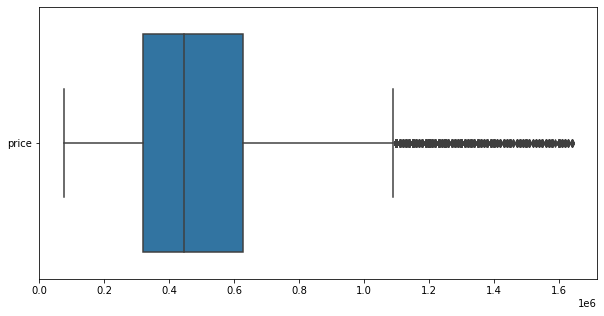

In [34]:
#boxplot for price once again
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_kch[["price"]], orient="h");

-----------------
### Visualization of Categorical Variables

Now that the price outliers have been trimmed/removed can look at the categorical variables like condition_num, grade_num, zones and compare them with the price median & mean  

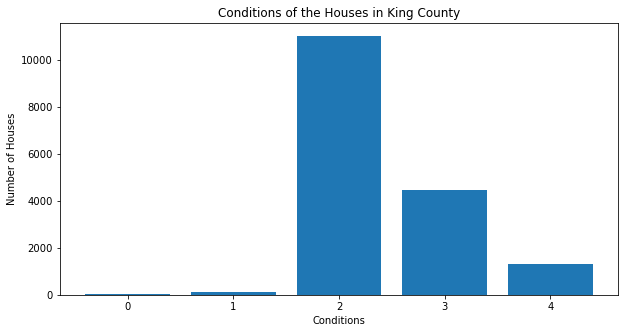

In [35]:
#creating a list of the cond_num values and count
cond_num_value = list(train_kch['cond_num'].value_counts().index)
con_num_count = list(train_kch['cond_num'].value_counts().values)

#plotting cond_num
fig, ax = plt.subplots(figsize=(10, 5))
x_labels = ['Poor','Fair', 'Average', 'Good','Very Good']

ax.bar(cond_num_value, con_num_count)
ax.set_xlabel("Conditions")
ax.set_ylabel("Number of Houses")
ax.set_title("Conditions of the Houses in King County");
#ax.set_xticks(x_labels)
#labels = ['Poor','Fair', 'Average', 'Good','Very Good']
#plt.xticks(cond_num_value, labels);

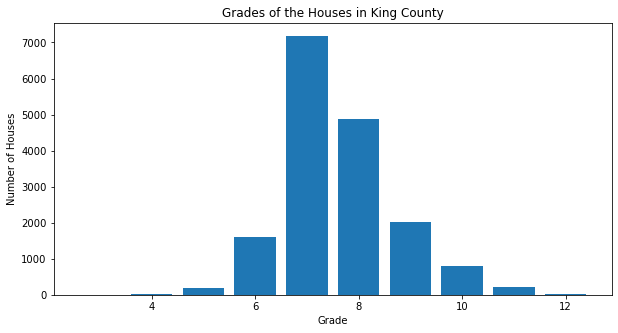

In [35]:
#creating a list of the grade_num values and count
grade_num_value = list(train_kch['grade_num'].value_counts().index)
grade_num_count = list(train_kch['grade_num'].value_counts().values)


#plotting grade_num
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(grade_num_value, grade_num_count)
ax.set_xlabel("Grade")
ax.set_ylabel("Number of Houses")
ax.set_title("Grades of the Houses in King County");
#labels = ['Poor', 'Fair', 'Better','Very Good','Excellent','Good','Better','Very Good','Excellent','Luxury']
#plt.xticks(grade_num_value, labels);

-------------------------
## Doing the same thing for test data

In [36]:
#null-value check
test_kch.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
price            0
dtype: int64

In [37]:
#test_kch = test_kch.dropna().reset_index(drop=True)

In [37]:
#replacing ? with 0.0
test_kch['sqft_basement'] = test_kch['sqft_basement'].str.replace('?', '0.0')

#changing its dtype from object to float
test_kch['sqft_basement'] = test_kch['sqft_basement'].astype(float)

In [38]:
#creating price per squarefoot
test_kch['price_sqft'] = test_kch['price']/test_kch['sqft_living']

In [39]:
#condition mapping
test_kch['cond_num'] = test_kch['condition'].map(condition_map)
test_kch.drop('condition', axis = 1, inplace=True);

#grade mapping
test_kch['grade_num'] = test_kch['grade'].map(grade_map)
test_kch.drop('grade', axis = 1, inplace=True);

#zipcode mapping
test_kch['zones'] = test_kch['zipcode'].map(zip_map)
test_kch.drop('zipcode', axis = 1, inplace=True);

#sanity check
test_kch.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,price,price_sqft,cond_num,grade_num,zones
3686,2015-02-20,3,0.75000,850,8573,1.00000,600,250.00000,1945,132500.00000,155.88235,2,6,Seattle
10247,2014-10-08,3,1.00000,1510,6083,1.00000,860,650.00000,1940,415000.00000,274.83444,3,6,Seattle
4037,2015-03-25,4,2.25000,1790,42000,1.00000,1170,620.00000,1983,494000.00000,275.97765,2,7,Rural
3437,2015-02-17,2,1.50000,1140,2500,1.00000,630,510.00000,1988,355000.00000,311.40351,2,7,Seattle
19291,2014-05-23,3,1.00000,1500,3920,1.00000,1000,500.00000,1947,606000.00000,404.00000,2,7,Seattle


--------------------------------
## OrdinalEncoder & OneHotEncoder - categorical variables cond_num, grade_num, zones

Can do OrdinalEncoder directly on condition and grade but might be better to bin them since there are a fair amount of unique values for both which could cause multicollinearlity. 

For condition:
- Poor 
- Fair
- Average
- Good 
- Very Good

For grade:
- 7 Average
- 8 Good
- 9 Better
- 6 Low Average
- 10 Very Good
- 11 Excellent
- 5 Fair
- 12 Luxury
- 4 Low
- 3 Poor

Can categorize condition values like:
<table>
  <tr>
    <th>Category</th>
    <th>Code</th>
  </tr>
  <tr>
    <td>Poor</td>
    <td>0</td>
  </tr>
  <tr>
    <td>Fair</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Average</td>
    <td>2</td>
  </tr>
 <tr>
    <td>Good</td>
    <td>3</td>
  </tr> 
 <tr>
    <td>Very Good</td>
    <td>4</td>
  </tr>
</table>


Can categorize grade values like:
<table>
  <tr>
    <th>Category</th>
    <th>Code</th>
  </tr>
  <tr>
    <td>Poor</td>
    <td>3</td>
  </tr>
  <tr>
    <td>Low</td>
    <td>4</td>
  </tr>
  <tr>
    <td>Fair</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Low Average</td>
    <td>6</td>
  </tr>
  <tr>
    <td>Average</td>
    <td>7</td>
  </tr>
 <tr>
    <td>Good</td>
    <td>8</td>
  </tr> 
 <tr>
    <td>Better</td>
    <td>9</td>
 </tr>
 <tr>
    <td>Very Good</td>
    <td>10</td>
  </tr>
 <tr>
    <td>Excellent</td>
    <td>11</td>
  </tr>
 <tr>
    <td>Luxury</td>
    <td>12</td>
  </tr>
</table>

In [42]:
#Creating variables storing our Ordinal & One Hot Encoding columns
train_kch_cat = train_kch[['cond_num', 'grade_num']]
train_kch_zones = train_kch[['zones']] 
test_kch_cat = test_kch[['cond_num', 'grade_num']]
test_kch_zones = test_kch[['zones']]

#Initializing Ordinal and One Hot
ore = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=12)
ore.fit(train_kch_cat)
ohe = OneHotEncoder(drop='first')
ohe.fit(train_kch_zones)


#Applying Ordinal and One Hot to our Train and Test
ohe_transform = ohe.transform(train_kch_zones)
zones_encoded = pd.DataFrame(ohe_transform.todense(), columns=ohe.get_feature_names(), 
                             index=train_kch_zones.index)

ohe_test_transform = ohe.transform(test_kch_zones)
zones_encoded_test = pd.DataFrame(ohe_test_transform.todense(), columns=ohe.get_feature_names(),
                                  index= test_kch_zones.index)

ore_transform = ore.transform(train_kch_cat)
cat_encoded = pd.DataFrame(ore_transform, columns = ['cond_num_cat','grade_num_cat'], 
                          index=train_kch_cat.index)

ore_test_transform = ore.transform(test_kch_cat)
cat_encoded_test = pd.DataFrame(ore_test_transform, columns = ['cond_num_cat','grade_num_cat'], 
                          index=test_kch_cat.index)

/Users/juanatavera/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/juanatavera/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [43]:
#sanity check
zones_encoded.head()

,x0_Seattle,x0_Suburbs
6243,1.00000,0.00000
8986,0.00000,0.00000
9419,0.00000,1.00000
10155,0.00000,1.00000
10436,1.00000,0.00000


In [44]:
zones_encoded_test.head()

,x0_Seattle,x0_Suburbs
3686,1.00000,0.00000
10247,1.00000,0.00000
4037,0.00000,0.00000
3437,1.00000,0.00000
19291,1.00000,0.00000


In [46]:
cat_encoded.head()

,cond_num_cat,grade_num_cat
6243,3.00000,4.00000
8986,3.00000,4.00000
9419,2.00000,6.00000
10155,2.00000,4.00000
10436,4.00000,4.00000


In [47]:
cat_encoded_test.head()

,cond_num_cat,grade_num_cat
3686,2.00000,3.00000
10247,3.00000,3.00000
4037,2.00000,4.00000
3437,2.00000,4.00000
19291,2.00000,4.00000


Now have the categorical variables encoding that can be used for the model.

---------------

## Standardized Scaler - numerical variables Train and test data

In [48]:
#standard scaling the numerical values dropping categorical and target 
#training data
X_train_kch_nums = train_kch.drop(['cond_num', 'grade_num', 
                                   'zones','date', 'price'], axis=1)
y_train_kch = train_kch['price']

#testing data
X_test_kch_nums = test_kch.drop(['cond_num','grade_num', 
                                'zones','date', 'price'], axis=1)
y_test_kch = test_kch['price']

#Standardized Scaler - fit to training x
ss = StandardScaler().fit(X_train_kch_nums)

#training data - transform
X_train_scaled = pd.DataFrame(ss.transform(X_train_kch_nums), columns=X_train_kch_nums.columns, index=X_train_kch_nums.index)

#testing data - transform
X_test_scaled = pd.DataFrame(ss.transform(X_test_kch_nums), columns=X_test_kch_nums.columns, index=X_test_kch_nums.index)

In [49]:
train_kch = pd.concat([X_train_scaled, cat_encoded, zones_encoded, y_train_kch],axis=1)
train_kch

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,price_sqft,cond_num_cat,grade_num_cat,x0_Seattle,x0_Suburbs,price
6243,0.71843,-0.11641,-0.71252,-0.25049,0.95046,-0.40604,-0.65310,0.03765,-0.27228,3.00000,4.00000,1.00000,0.00000,332500.00000
8986,-0.39928,-0.45755,-0.72449,-0.12370,-0.90396,-0.79513,0.03253,0.31098,0.12932,3.00000,4.00000,0.00000,0.00000,390000.00000
9419,0.71843,0.90701,1.29949,-0.24682,0.95046,1.77289,-0.65310,1.33599,-0.02735,2.00000,6.00000,0.00000,1.00000,800000.00000
10155,0.71843,0.56587,0.03001,-0.19719,-0.90396,-0.69137,1.33286,0.10598,-0.33595,2.00000,4.00000,0.00000,1.00000,462000.00000
10436,-0.39928,-0.11641,0.55697,-0.27014,0.02325,-0.09476,1.28557,-1.67070,0.17995,4.00000,4.00000,1.00000,0.00000,695000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-0.39928,0.56587,0.23361,-0.22654,0.95046,0.61858,-0.65310,1.13099,-0.59484,2.00000,4.00000,0.00000,0.00000,440000.00000
21575,0.71843,0.90701,0.88032,-0.27592,0.95046,1.31894,-0.65310,1.47266,-0.50661,2.00000,5.00000,1.00000,0.00000,572000.00000
5390,0.71843,-0.79869,-0.60473,-0.14543,-0.90396,-0.28931,-0.65310,0.17432,-0.60792,3.00000,3.00000,0.00000,0.00000,299800.00000
860,-2.63471,-1.82211,-1.98200,0.00666,-0.90396,-1.78083,-0.65310,-0.26985,3.70136,2.00000,2.00000,1.00000,0.00000,245000.00000


In [50]:
test_kch = pd.concat([X_test_scaled, cat_encoded_test, zones_encoded_test, y_test_kch],axis=1)
test_kch

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,price_sqft,cond_num_cat,grade_num_cat,x0_Seattle,x0_Suburbs,price
3686,-0.39928,-1.82211,-1.41912,-0.15625,-0.90396,-1.49550,-0.06204,-0.88486,-0.99262,2.00000,3.00000,1.00000,0.00000,132500.00000
10247,-0.39928,-1.48097,-0.62868,-0.21937,-0.90396,-1.15828,0.88365,-1.05570,0.14955,3.00000,3.00000,1.00000,0.00000,415000.00000
4037,0.71843,0.22473,-0.29335,0.69107,-0.90396,-0.75622,0.81273,0.41349,0.16053,2.00000,4.00000,0.00000,0.00000,494000.00000
3437,-1.51700,-0.79869,-1.07181,-0.31019,-0.90396,-1.45659,0.55266,0.58432,0.50069,2.00000,4.00000,1.00000,0.00000,355000.00000
19291,-0.39928,-1.48097,-0.64066,-0.27420,-0.90396,-0.97671,0.52902,-0.81653,1.38980,2.00000,4.00000,1.00000,0.00000,606000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522,-1.51700,-1.48097,-1.21552,-0.24352,-0.90396,-0.95077,-0.65310,-0.78236,-0.84200,3.00000,3.00000,0.00000,1.00000,175000.00000
11119,-0.39928,0.56587,0.01803,-0.16641,0.95046,0.38512,-0.65310,1.06266,-0.63950,2.00000,5.00000,1.00000,0.00000,394950.00000
11973,1.83615,-0.11641,0.10187,3.11348,0.02325,0.47591,-0.65310,-1.97820,-0.51013,2.00000,4.00000,0.00000,1.00000,437000.00000
17601,-0.39928,0.56587,-0.05382,-0.18150,0.95046,0.30730,-0.65310,0.65265,-1.07565,2.00000,4.00000,0.00000,1.00000,293000.00000


-----------------

## Creating a Pairplot and a Corr Heatmap to see which features are best for the model

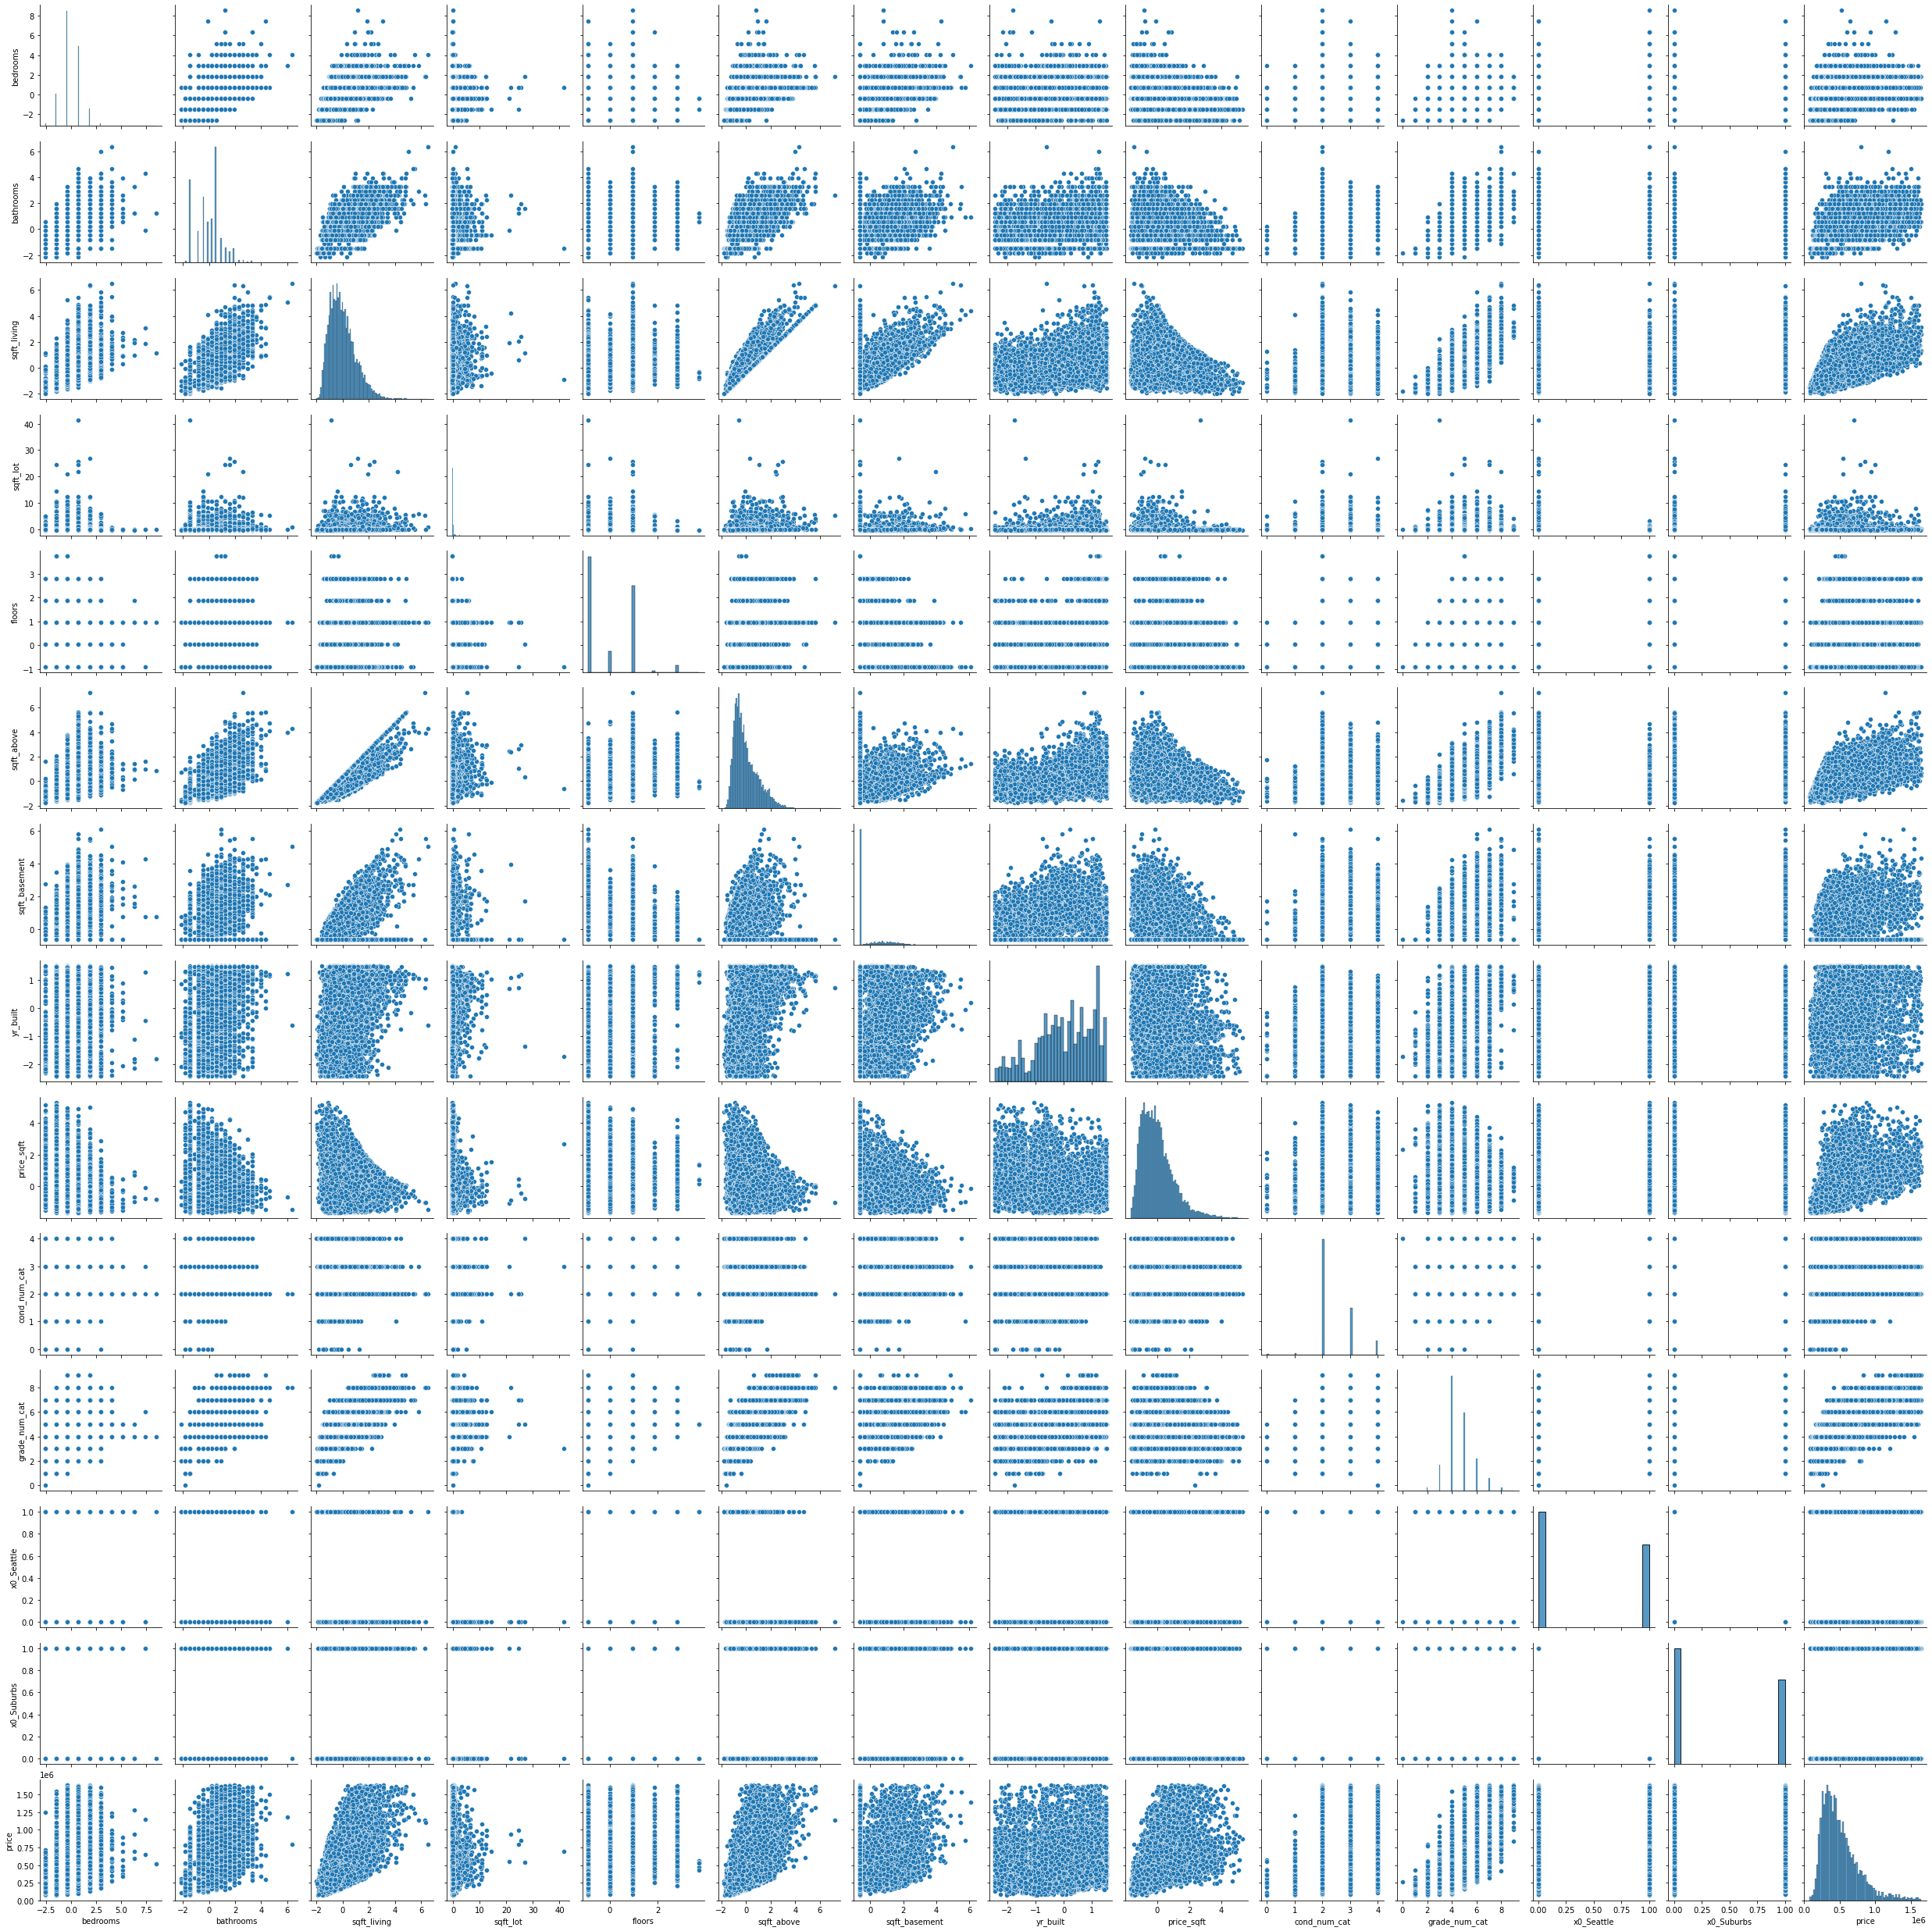

In [51]:
#pairplot
#to be able to understand the pairplot better
sns.pairplot(train_kch)
plt.show()

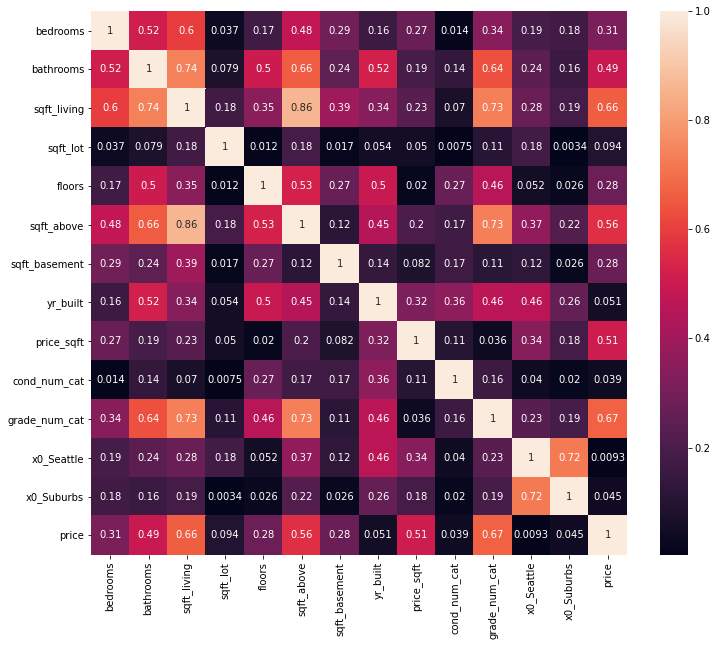

In [52]:
plt.figure(figsize=(12,10))
sns.heatmap(train_kch.corr().abs(), annot=True)
plt.show()

In [53]:
price_corr = train_kch.corr()['price']
price_corr.abs().sort_values(ascending=False)[1:]

grade_num_cat   0.67056
sqft_living     0.66333
sqft_above      0.56401
price_sqft      0.50825
bathrooms       0.49425
bedrooms        0.31369
floors          0.27808
sqft_basement   0.27545
sqft_lot        0.09378
yr_built        0.05132
x0_Suburbs      0.04507
cond_num_cat    0.03934
x0_Seattle      0.00932
Name: price, dtype: float64

-----------------

## Modeling - Dummy Regressor, Simple Linear, Multi Linear

In [54]:
#begining with the Dummy Regressor - the mean of y: price
from sklearn.dummy import DummyRegressor 

#defining X and y for train_kch
X_train_kch = train_kch['sqft_living']
y_train_kch = train_kch['price']

#defining X and y for test_kch
X_test_kch = test_kch['sqft_living']
y_test_kch = test_kch['price']

dummy_mean = DummyRegressor(strategy='mean').fit(X_train_kch, y_train_kch)
y_predict_dummy_mean = dummy_mean.predict(X_test_kch)

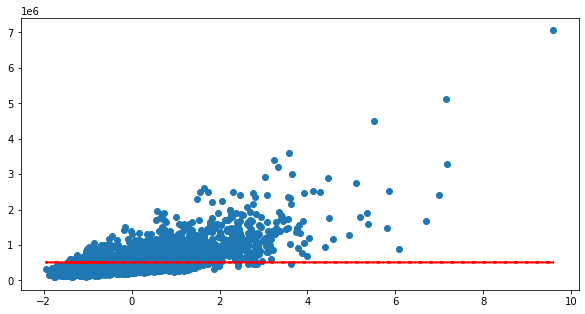

In [55]:
#plotting the Dummy Regressor mean and predictions
plt.figure(figsize=(10, 5))
plt.scatter(X_test_kch, y_test_kch)
plt.plot(X_test_kch, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy');

In [56]:
dummy_regr = DummyRegressor(strategy = 'mean')
dummy_regr.fit(X_train_kch, y_train_kch)
dummy_regr.predict(X_train_kch)
dummy_regr.predict(X_test_kch)
dummy_regr.score(X_train_kch, y_train_kch)
dummy_regr.score(X_test_kch, y_test_kch)
dummy_train_RMSE = MSE(y_train_kch, dummy_regr.predict(X_train_kch),squared = False)
dummy_test_RMSE = MSE(y_test_kch, dummy_regr.predict(X_test_kch), squared = False)

print()
print(f'Baseline Model Train Score: {dummy_regr.score(X_train_kch, y_train_kch)}')
print(f'Baseline Model Train RMSE: {round(dummy_train_RMSE)}')
print()
print(f'Baseline Model Test Score: {dummy_regr.score(X_test_kch, y_test_kch)}')
print(f'Baseline Model Test RMSE: {round(dummy_test_RMSE)}')


Baseline Model Train Score: 0.0
Baseline Model Train RMSE: 259637.0

Baseline Model Test Score: -0.005965155057880089
Baseline Model Test RMSE: 361930.0


## Simple Linear Regression

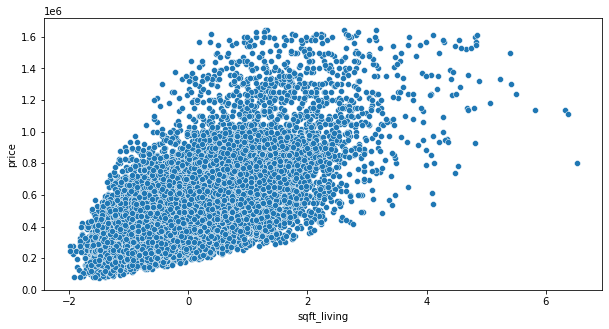

In [59]:
# simple Linear Regression Model with sqft_living 

#plotting sqft_living to see if it has a linear relationship with price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=train_kch, x="sqft_living", y="price");

Since it's a categorical variable it won't show a perfect traditional linear relationship but can generally see that the higher the grade the more expensive it will be

In [58]:
X_train_simple = train_kch[['sqft_living']]
X_test_simple = test_kch[['sqft_living']]

#LinearRegression
simple_model = LinearRegression()
simple_model.fit(X_train_simple,y_train_kch)

#predicting the data
simple_predict_train = simple_model.predict(X_train_simple)
simple_predict_test = simple_model.predict(X_test_simple)

#getting the scores
simple_model_score_train = simple_model.score(X_train_simple, y_train_kch)
simple_model_score_test = simple_model.score(X_test_simple, y_test_kch)

#Root mean squared error
simple_train_RMSE = MSE(y_train_kch, simple_predict_train, squared = False)
simple_test_RMSE = MSE(y_test_kch, simple_predict_test, squared = False)


print(f'Simple Model (Square feet living) Train score: {simple_model_score_train}')
print(f'Simple Model Train RMSE: {round(simple_train_RMSE)}')
print()
print(f'Simple Model (Square feet living) Test score:{simple_model_score_test}')
print(f'Simple Model Test RMSE: {round(simple_test_RMSE)}')


Simple Model (Square feet living) Train score: 0.4400058368806469
Simple Model Train RMSE: 194293.0

Simple Model (Square feet living) Test score:0.4590160691292965
Simple Model Test RMSE: 265415.0


In [61]:
train_kch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16947 entries, 6243 to 15795
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       16947 non-null  float64
 1   bathrooms      16947 non-null  float64
 2   sqft_living    16947 non-null  float64
 3   sqft_lot       16947 non-null  float64
 4   floors         16947 non-null  float64
 5   sqft_above     16947 non-null  float64
 6   sqft_basement  16947 non-null  float64
 7   yr_built       16947 non-null  float64
 8   price_sqft     16947 non-null  float64
 9   cond_num_cat   16947 non-null  float64
 10  grade_num_cat  16947 non-null  float64
 11  x0_Seattle     16947 non-null  float64
 12  x0_Suburbs     16947 non-null  float64
 13  price          16947 non-null  float64
dtypes: float64(14)
memory usage: 1.9 MB


In [99]:
X_train_second = train_kch[['sqft_living', 'grade_num_cat']]
X_test_second = test_kch[['sqft_living', 'grade_num_cat']]

#LinearRegression
second_model = LinearRegression()
second_model.fit(X_train_second,y_train_kch)

#predicting the data
second_predict_train = second_model.predict(X_train_second)
second_predict_test = second_model.predict(X_test_second)

#getting the scores
second_model_score_train = second_model.score(X_train_second, y_train_kch)
second_model_score_test = second_model.score(X_test_second, y_test_kch)

#Root mean squared error
second_train_RMSE = MSE(y_train_kch, second_predict_train, squared = False)
second_test_RMSE = MSE(y_test_kch, second_predict_test, squared = False)


print(f'Second Model Train score: {second_model_score_train}')
print(f'Simple Model Train RMSE: {round(second_train_RMSE)}')
print()
print(f'Second Model Test score:{second_model_score_test}')
print(f'Second Model Test RMSE: {round(second_test_RMSE)}')

Second Model Train score: 0.5128649906229341
Simple Model Train RMSE: 181213.0

Second Model Test score:0.49736294061188724
Second Model Test RMSE: 255835.0


In [96]:
X_train_third = train_kch[['sqft_living', 'grade_num_cat', 'price_sqft']]
X_test_third = test_kch[['sqft_living', 'grade_num_cat', 'price_sqft']]

#LinearRegression
third_model = LinearRegression()
third_model.fit(X_train_third,y_train_kch)

#predicting the data
third_predict_train = third_model.predict(X_train_third)
third_predict_test = third_model.predict(X_test_third)

#getting the scores
third_model_score_train = third_model.score(X_train_third, y_train_kch)
third_model_score_test = third_model.score(X_test_third, y_test_kch)

#Root mean squared error
third_train_RMSE = MSE(y_train_kch, third_predict_train, squared = False)
third_test_RMSE = MSE(y_test_kch, third_predict_test, squared = False)


print(f'Third Model Train score: {third_model_score_train}')
print(f'Third Model Train RMSE: {round(third_train_RMSE)}')
print()
print(f'Third Model Test score:{third_model_score_test}')
print(f'Third Model Test RMSE: {round(third_test_RMSE)}')

Third Model Train score: 0.9053833787826725
Third Model Train RMSE: 79864.0

Third Model Test score:0.854145452448775
Third Model Test RMSE: 137814.0


In [115]:
X_train_fourth = train_kch[['sqft_living', 'grade_num_cat', 'price_sqft', 'x0_Seattle', 'x0_Suburbs']]
X_test_fourth = test_kch[['sqft_living', 'grade_num_cat', 'price_sqft', 'x0_Seattle', 'x0_Suburbs']]

#LinearRegression
fourth_model = LinearRegression()
fourth_model.fit(X_train_fourth,y_train_kch)

#predicting the data
fourth_predict_train = fourth_model.predict(X_train_fourth)
fourth_predict_test = fourth_model.predict(X_test_fourth)

#getting the scores
fourth_model_score_train = fourth_model.score(X_train_fourth, y_train_kch)
fourth_model_score_test = fourth_model.score(X_test_fourth, y_test_kch)

#Root mean squared error
fourth_train_RMSE = MSE(y_train_kch, fourth_predict_train, squared = False)
fourth_test_RMSE = MSE(y_test_kch, fourth_predict_test, squared = False)


print(f'Fourth Model Train score: {fourth_model_score_train}')
print(f'Fourth Model Train RMSE: {round(fourth_train_RMSE)}')
print()
print(f'Fourth Model Test score:{fourth_model_score_test}')
print(f'Fourth Model Test RMSE: {round(fourth_test_RMSE)}')

Fourth Model Train score: 0.9060811275022633
Fourth Model Train RMSE: 79569.0

Fourth Model Test score:0.8544046868334366
Fourth Model Test RMSE: 137691.0


In [114]:
X_train_fifth = train_kch[['sqft_above', 'grade_num_cat', 'price_sqft', 'x0_Seattle', 'x0_Suburbs']]
X_test_fifth = test_kch[['sqft_above', 'grade_num_cat', 'price_sqft', 'x0_Seattle', 'x0_Suburbs']]

#LinearRegression
fifth_model = LinearRegression()
fifth_model.fit(X_train_fifth,y_train_kch)

#predicting the data
fifth_predict_train = fifth_model.predict(X_train_fifth)
fifth_predict_test = fifth_model.predict(X_test_fifth)

#getting the scores
fifth_model_score_train = fifth_model.score(X_train_fifth, y_train_kch)
fifth_model_score_test = fifth_model.score(X_test_fifth, y_test_kch)

#Root mean squared error
fifth_train_RMSE = MSE(y_train_kch, fifth_predict_train, squared = False)
fifth_test_RMSE = MSE(y_test_kch, fifth_predict_test, squared = False)


print(f'Fifth Model Train score: {fifth_model_score_train}')
print(f'Fifth Model Train RMSE: {round(fifth_train_RMSE)}')
print()
print(f'Fifth Model Test score:{fifth_model_score_test}')
print(f'Fifth Model Test RMSE: {round(fifth_test_RMSE)}')

Fifth Model Train score: 0.7728388124675141
Fifth Model Train RMSE: 123746.0

Fifth Model Test score:0.7355832481969793
Fifth Model Test RMSE: 185557.0


In [101]:
X_train_sixth = train_kch[['bedrooms', 'bathrooms']]
X_test_sixth = test_kch[['bedrooms', 'bathrooms']]

#LinearRegression
sixth_model = LinearRegression()
sixth_model.fit(X_train_sixth,y_train_kch)

#predicting the data
sixth_predict_train = sixth_model.predict(X_train_sixth)
sixth_predict_test = sixth_model.predict(X_test_sixth)

#getting the scores
sixth_model_score_train = sixth_model.score(X_train_sixth, y_train_kch)
sixth_model_score_test = sixth_model.score(X_test_sixth, y_test_kch)

#Root mean squared error
sixth_train_RMSE = MSE(y_train_kch, sixth_predict_train, squared = False)
sixth_test_RMSE = MSE(y_test_kch, sixth_predict_test, squared = False)


print(f'Sixth Model Train score: {sixth_model_score_train}')
print(f'Sixth Model Train RMSE: {round(sixth_train_RMSE)}')
print()
print(f'Sixth Model Test score:{sixth_model_score_test}')
print(f'Sixth Model Test RMSE: {round(sixth_test_RMSE)}')

Sixth Model Train score: 0.24901731969864738
Sixth Model Train RMSE: 224999.0

Sixth Model Test score:0.24234615556529893
Sixth Model Test RMSE: 314100.0


In [104]:
X_train_seventh = train_kch[['bedrooms', 'bathrooms', 'floors']]
X_test_seventh = test_kch[['bedrooms', 'bathrooms', 'floors']]

#LinearRegression
seventh_model = LinearRegression()
seventh_model.fit(X_train_seventh,y_train_kch)

#predicting the data
seventh_predict_train = seventh_model.predict(X_train_seventh)
seventh_predict_test = seventh_model.predict(X_test_seventh)

#getting the scores
seventh_model_score_train = seventh_model.score(X_train_sixth, y_train_kch)
seventh_model_score_test = seventh_model.score(X_test_sixth, y_test_kch)

#Root mean squared error
seventh_train_RMSE = MSE(y_train_kch, seventh_predict_train, squared = False)
seventh_test_RMSE = MSE(y_test_kch, seventh_predict_test, squared = False)


print(f'Seventh Model Train score: {seventh_model_score_train}')
print(f'Seventh Model Train RMSE: {round(seventh_train_RMSE)}')
print()
print(f'Seventh Model Test score:{seventh_model_score_test}')
print(f'Seventh Model Test RMSE: {round(seventh_test_RMSE)}')

Seventh Model Train score: 0.25085592303937065
Seventh Model Train RMSE: 224724.0

Seventh Model Test score:0.2405563173432883
Seventh Model Test RMSE: 314471.0


In [108]:
X_train_eighth = train_kch[['sqft_above', 'sqft_basement', 'sqft_lot', 'price_sqft']]
X_test_eighth = test_kch[['sqft_above', 'sqft_basement', 'sqft_lot', 'price_sqft']]

#LinearRegression
eighth_model = LinearRegression()
eighth_model.fit(X_train_eighth,y_train_kch)

#predicting the data
eighth_predict_train = eighth_model.predict(X_train_eighth)
eighth_predict_test = eighth_model.predict(X_test_eighth)

#getting the scores
eighth_model_score_train = eighth_model.score(X_train_eighth, y_train_kch)
eighth_model_score_test = eighth_model.score(X_test_eighth, y_test_kch)

#Root mean squared error
eighth_train_RMSE = MSE(y_train_kch, eighth_predict_train, squared = False)
eighth_test_RMSE = MSE(y_test_kch, eighth_predict_test, squared = False)


print(f'Eighth Model Train score: {eighth_model_score_train}')
print(f'Eighth Model Train RMSE: {round(eighth_train_RMSE)}')
print()
print(f'Eighth Model Test score:{eighth_model_score_test}')
print(f'Eighth Model Test RMSE: {round(eighth_test_RMSE)}')

Eighth Model Train score: 0.8968906583348435
Eighth Model Train RMSE: 83371.0

Eighth Model Test score:0.8499113538555615
Eighth Model Test RMSE: 139800.0


In [119]:
X_train_ninth = train_kch.drop('price', axis=1)
X_test_ninth = test_kch.drop('price', axis=1)

#LinearRegression
ninth_model = LinearRegression()
ninth_model.fit(X_train_ninth,y_train_kch)

#predicting the data
ninth_predict_train = ninth_model.predict(X_train_ninth)
ninth_predict_test = ninth_model.predict(X_test_ninth)

#getting the scores
ninth_model_score_train = ninth_model.score(X_train_ninth, y_train_kch)
ninth_model_score_test = ninth_model.score(X_test_ninth, y_test_kch)

#Root mean squared error
ninth_train_RMSE = MSE(y_train_kch, ninth_predict_train, squared = False)
ninth_test_RMSE = MSE(y_test_kch, ninth_predict_test, squared = False)


print(f'Ninth Model Train score: {ninth_model_score_train}')
print(f'Ninth Model Train RMSE: {round(ninth_train_RMSE)}')
print()
print(f'Ninth Model Test score:{ninth_model_score_test}')
print(f'Ninth Model Test RMSE: {round(ninth_test_RMSE)}')

Ninth Model Train score: 0.9092803382428208
Ninth Model Train RMSE: 78202.0

Ninth Model Test score:0.8530834106908546
Ninth Model Test RMSE: 138315.0


## Fourth Model - sqft_living, grade_num_cat, price_sqft, x0_Seattle, x0_Suburbs

The fourth model performed the best therefore we are now getting summary from it

In [135]:
X_col = train_kch[['sqft_living']]
formula_basic = 'price ~ sqft_living'

baseline_model = ols(formula=formula_basic, data=train_kch).fit()

In [137]:
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                 1.331e+04
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:44:45   Log-Likelihood:            -2.3041e+05
No. Observations:               16947   AIC:                         4.608e+05
Df Residuals:                   16945   BIC:                         4.608e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.075e+05   1492.577    340.041      0.000    5.05e+05     5.1e+05
sqft_living  1.722e+05   1492.577    115.387      0.000    1.69e+05    1.75e+05
==============================================================================
Omnibus:                     2898.798   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6317.290
Skew:                           1.004   Prob(JB):                         0.00
Kurtosis:                       5.217   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
from statsmodels.formula.api import ols
#defining the columns
X_cols = train_kch[['sqft_living', 'grade_num_cat', 'price_sqft', 'x0_Seattle', 'x0_Suburbs']]

#formula
formula = 'price ~ ' + ' + '.join(X_cols)

In [130]:
model = ols(formula=formula, data=train_kch).fit()

In [131]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 3.269e+04
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:39:48   Log-Likelihood:            -2.1528e+05
No. Observations:               16947   AIC:                         4.306e+05
Df Residuals:                   16941   BIC:                         4.306e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.872e+05   4344.248     89.125      0.000    3.79e+05    3.96e+05
sqft_living    1.949e+05    974.918    199.931      0.000    1.93e+05    1.97e+05
grade_num_cat  2.265e+04    871.300     25.996      0.000    2.09e+04    2.44e+04
price_sqft     1.745e+05    701.595    248.746      0.000    1.73e+05    1.76e+05
x0_Seattle      1.91e+04   1915.345      9.971      0.000    1.53e+04    2.29e+04
x0_Suburbs      1.92e+04   1801.636     10.656      0.000    1.57e+04    2.27e+04
==============================================================================
Omnibus:                     2867.726   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28063.067
Skew:                          -0.521   Prob(JB):                         0.00
Kurtosis:                       9.217   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""